<a href="https://colab.research.google.com/github/xCosmicx/ATA/blob/main/week3/multi_class_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Exercise: Multi-class Image Classification

Now that you have learnt how to train a model to do binary image classification of cats and dogs using Convolutional Neural Network. 

Modify the code to train a model to recognise whether a hand gesture is one of the gesture in the rock, paper and scissor game. 

The dataset of rock paper scissor can be downloaded from https://nypai.s3-ap-southeast-1.amazonaws.com/datasets/rps2.zip

### Step 1: Import the necessary packages

In [2]:
import os
import tensorflow as tf
import keras as keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Download Datasets

Download the dataset and unzip the file to a folder.

In [3]:
dataset_URL = 'https://nypai.s3-ap-southeast-1.amazonaws.com/datasets/rps2.zip'
path_to_zip = tf.keras.utils.get_file('rps2.zip', origin=dataset_URL, extract=True, cache_dir='.')
print(path_to_zip)
PATH = os.path.join(os.path.dirname(path_to_zip), 'rps2')
print(PATH)


230350848/230335488 [==============================] - 4s 0us/step
./datasets/rps2.zip
./datasets/rps2


### Step 3: Set up your train and validation directory. 

Examine your dataset folder and set your train_dir and validation_dir to point to the correct directories.

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

### Step 4: Set up the  tf.keras.preprocessing.image_dataset_from_directory()

Set up the  tf.keras.preprocessing.image_dataset_from_directory() for both train and validation set.

In [5]:
# All images will be rescaled by 1./255
# 255 * 1/255 = (255X1)/255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
# This is the target directory
train_dir,
# All images will be resized to 150x150
target_size=(150, 150),
batch_size=20,
class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='sparse')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [6]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


You can see the labels is **NOT** one-hot-encoded.  Try changing the class_mode to 'categorical' and observe that the label will be one-hot-encoded.

Print out the class indices so that you know what label is assigned to which class.  Hint: use ``class_indices`` of the generator.

In [7]:
labels_batch[:1]

array([0.], dtype=float32)

In [8]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

### Step 5: Create your model

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

### Step 6: Compile and Train the Model

Make sure you choose the correct loss function. 

In [10]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=126,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=18)

Epoch 1/30
126/126 [==============================] - 26s 113ms/step - loss: 0.6363 - acc: 0.7262 - val_loss: 0.6507 - val_acc: 0.6167
Epoch 2/30
126/126 [==============================] - 14s 107ms/step - loss: 0.1130 - acc: 0.9702 - val_loss: 0.2007 - val_acc: 0.9444
Epoch 3/30
126/126 [==============================] - 13s 102ms/step - loss: 0.0382 - acc: 0.9889 - val_loss: 0.2365 - val_acc: 0.9111
Epoch 4/30
126/126 [==============================] - 13s 102ms/step - loss: 0.0125 - acc: 0.9968 - val_loss: 0.2280 - val_acc: 0.9083
Epoch 5/30
126/126 [==============================] - 13s 101ms/step - loss: 0.0074 - acc: 0.9972 - val_loss: 0.1757 - val_acc: 0.9333
Epoch 6/30
126/126 [==============================] - 14s 111ms/step - loss: 0.0023 - acc: 0.9996 - val_loss: 0.1568 - val_acc: 0.9194
Epoch 7/30
126/126 [==============================] - 13s 102ms/step - loss: 0.0048 - acc: 0.9988 - val_loss: 0.1974 - val_acc: 0.9167
Epoch 8/30
126/126 [==============================] - 1

Visualize your training using Tensorboard.

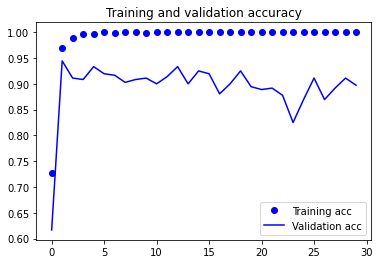

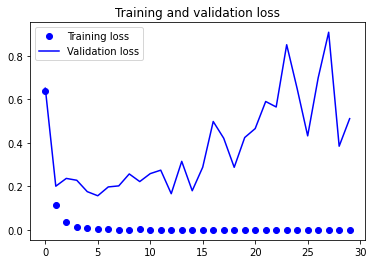

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend ()

plt.figure()

plt.plot (epochs, loss, 'bo', label='Training loss')
plt.plot (epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Step 7: Save your Model

Save your model for use in inference later on.

In [13]:
model.save("rps_model")

INFO:tensorflow:Assets written to: rps_model/assets


### Test your model

The following code cells shows you how to set up Google Colab to take a picture using your webcam. Take a picture of your hand gesture (rock, paper or scissors) and infer using your saved model.

In [14]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


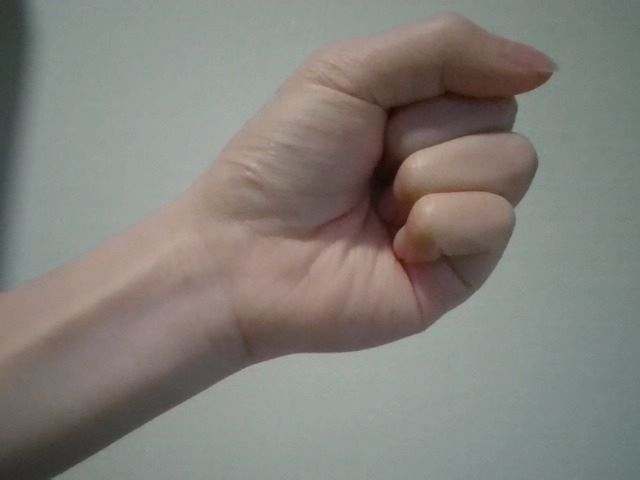

In [15]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Write code to read the image and reshape the tensor (to include batch axis) and use your model to predict the label.

In [16]:
img = keras.preprocessing.image.load_img(
    filename, target_size=(150, 150)
)

# we convert the image to numpy array
img_array = keras.preprocessing.image.img_to_array(img)

# Although we only have single image, however our model expected data in batches
# so we will need to add in the batch axis too
img_array = tf.expand_dims(img_array, 0) # Create a batch

# we load the model saved earlier and do the inference
model = tf.keras.models.load_model('rps_model')
predictions = model(img_array)
label = np.argmax(predictions)

In [17]:
print(predictions)

tf.Tensor([[0. 1. 0.]], shape=(1, 3), dtype=float32)


In [18]:
print(label)

1


In [19]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


In [20]:
model.predict(img_array)

array([[0., 1., 0.]], dtype=float32)